문항 1. 보간법(Interpolation)의 필요성 영상을 확대하거나 축소, 혹은 회전할 때 픽셀 좌표가 정수가 아닌 실수로 떨어지거나, 빈 공간(hole)이 생길 수 있습니다. 이때 새로운 픽셀 값을 결정하기 위해 보간법을 사용합니다. 대표적인 보간법인 Nearest Neighbor, linear, cubic 중 속도가 가장 빠르지만 화질이 거친 방법과 가장 부드럽고 정교하지만 계산 비용이 높은 방법을 순서대로 적으세요.

답변 작성란:

속도가 가장 빠른 것: Nearest

가장 정교한 것: cubic

문항 2. Affine 변환과 Perspective 변환의 차이 기하학적 변환 중 Affine 변환은 평행선을 유지하는 변환으로 2x3 행렬을 사용하며 ( A ) 개의 점 매핑이 필요합니다. 반면 Perspective(투시) 변환은 원근감을 표현할 수 있는 변환으로 3x3 행렬을 사용하며 ( B ) 개의 점 매핑이 필요합니다. 빈칸 A와 B에 들어갈 숫자를 적으세요.

답변 작성란:

( A ): 3

( B ): 4

문항 3. 가우시안 블러(Gaussian Blur) 적용 이미지의 노이즈를 제거하기 위해 가우시안 필터를 자주 사용합니다. data 폴더의 noise_sample.jpg를 읽어온 후, 커널 크기 (5, 5)의 가우시안 블러를 적용하여 blurred_img를 생성하는 코드를 작성하세요. (표준편차 sigmaX는 0으로 설정하여 자동 계산되게 하세요.)

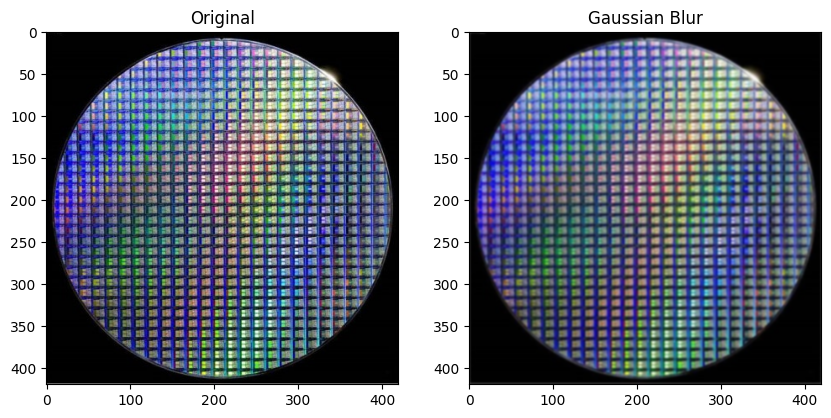

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기 (예시 경로)
img = cv2.imread('/home/kim/rokey/ragular_cours/AI-course/강의_7기_AI응용_2차시_opencv_기하학적 변환/wafer.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Matplotlib 출력을 위해 변환

# TODO: 가우시안 블러 적용 (커널 크기 5x5, sigmaX=0)
blurred_img = cv2.GaussianBlur(img,(5,5),0)

# 결과 출력
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(blurred_img), plt.title('Gaussian Blur')
plt.show()

문항 4. 이미지 회전 (Rotation) 영상을 중심점을 기준으로 반시계 방향으로 45도 회전시키려고 합니다. cv2.getRotationMatrix2D를 사용하여 회전 변환 행렬을 구하고, cv2.warpAffine을 통해 회전된 이미지 rotated_img를 생성하세요. (회전 후 잘리는 영역은 그대로 둡니다.)

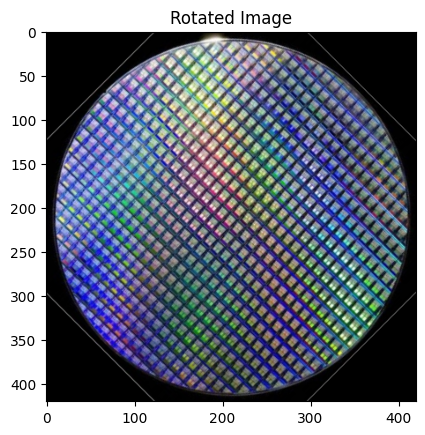

In [4]:
h, w = img.shape[:2]
center = (w // 2, h // 2) # 이미지 중심점

# TODO: 45도 회전 변환 행렬 구하기 (scale=1.0)
M = cv2.getRotationMatrix2D(center,45,1)

# TODO: Affine 변환 적용하여 이미지 회전
rotated_img = cv2.warpAffine(img,M,(h,w))

plt.imshow(rotated_img)
plt.title('Rotated Image')
plt.show()

문항 5. 이미지 크기 조절 (Resize) 이미지를 가로, 세로 모두 0.5배로 축소하려고 합니다. cv2.resize 함수를 사용하여 resized_img를 생성하세요. cv2.INTER_NEAREST 사용하세요.

In [5]:
# TODO: 이미지 축소 (0.5배)
# dsize를 (0,0)으로 두고 fx, fy를 활용하거나, 직접 계산된 크기를 튜플로 입력
resized_img = cv2.resize(img,(0,0),fx=0.5, fy=0.5)

print(f"Original shape: {img.shape}")
print(f"Resized shape: {resized_img.shape}")

Original shape: (420, 420, 3)
Resized shape: (210, 210, 3)


문항 6. 투시 변환 (Perspective Transform) 찌그러진 문서를 정면에서 본 것처럼 펼치기 위해 투시 변환을 수행합니다. 입력 이미지의 4개 좌표(src_pts)가 출력 이미지의 4개 좌표(dst_pts)로 매핑되도록 변환 행렬을 구하고 변환을 수행하세요.

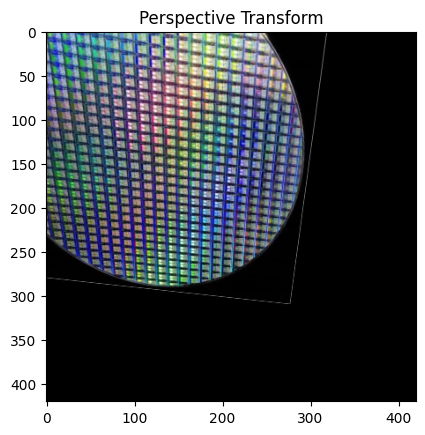

In [6]:
# 입력 좌표 (왼쪽 위, 오른쪽 위, 오른쪽 아래, 왼쪽 아래 순서라고 가정)
src_pts = np.float32([[100, 100], [400, 50], [450, 400], [50, 450]])

# 출력 좌표 (변환 후 크기 300x300 정사각형)
dst_pts = np.float32([[0, 0], [300, 0], [300, 300], [0, 300]])

# TODO: 투시 변환 행렬(Matrix) 구하기
M_perspective = cv2.getPerspectiveTransform(src_pts,dst_pts)

# TODO: 투시 변환 적용 (결과 이미지 크기는 300x300)
perspective_img = cv2.warpPerspective(img,M_perspective,(h,w))

plt.imshow(perspective_img)
plt.title('Perspective Transform')
plt.show()